In [1]:
import sys
print(sys.path)

['/home/bigdata', '/home/bigdata/spark/python', '/home/bigdata/spark/python/lib/py4j-0.10.9-src.zip', '/python', '/python/lib/py4j-0.10.9-src.zip', '/home/bigdata', '/home/bigdata/anaconda3/lib/python37.zip', '/home/bigdata/anaconda3/lib/python3.7', '/home/bigdata/anaconda3/lib/python3.7/lib-dynload', '', '/home/bigdata/anaconda3/lib/python3.7/site-packages', '/home/bigdata/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/bigdata/.ipython']


In [2]:
import os 
print(os.environ['SPARK_HOME'])
print(os.environ['JAVA_HOME'])

print(os.environ['PATH'])
os.environ["pyspark_python"] = "/anconda3/envs/ucBEXtension/bin/python"

/home/bigdata/spark
/usr/lib/jvm/jre-1.8.0-openjdk.x86_64/
/home/bigdata/spark/bin:/home/bigdata/spark/python:/home/bigdata/hive/bin:/home/bigdata/anaconda3/bin:/home/bigdata/anaconda3/condabin:/bin:/python:/home/bigdata/hive/bin:/usr/local/bin:/usr/bin:/bin:/usr/local/sbin:/usr/sbin:/sbin:/home/bigdata/hadoop-2.7.3/sbin:/home/bigdata/hadoop-2.7.3/bin:/home/bigdata/scala/bin:/home/bigdata/db-derby-10.13.1.1-bin/bin:/home/bigdata/kafka_2.12-2.5.0/bin:/home/bigdata/spark/bin:/usr/lib/jvm/jre-1.8.0-openjdk.x86_64:/home/bigdata/hbase/bin:/home/bigdata/flink/bin:/home/bigdata/apache-flume-1.7.0-bin/bin:/home/bigdata/bin:/home/bigdata/hadoop-2.7.3/sbin:/home/bigdata/hadoop-2.7.3/bin:/home/bigdata/scala/bin:/home/bigdata/db-derby-10.13.1.1-bin/bin:/home/bigdata/kafka_2.12-2.5.0/bin:/home/bigdata/spark/bin:/usr/lib/jvm/jre-1.8.0-openjdk.x86_64:/home/bigdata/hbase/bin:/home/bigdata/flink/bin:/home/bigdata/apache-flume-1.7.0-bin/bin


In [3]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [4]:
import findspark
findspark.init()

In [5]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, types
from pyspark.sql import Row
from pyspark.sql import SQLContext

In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("KafkaSparkIntegration") \
    .config("spark.driver.cores", "1") \
    .config("spark.driver.memory", "1g") \
    .config("spark.executor.cores", "2") \
    .config("spark.executor.memory", "1gb") \
    .config("spark.num.executors", "2") \
    .enableHiveSupport() \
    .getOrCreate()

sc = spark.sparkContext

In [7]:
spark.sparkContext.getConf().getAll()

[('spark.driver.host', '192.168.161.132'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.memory', '1g'),
 ('spark.executor.cores', '2'),
 ('spark.num.executors', '2'),
 ('spark.driver.port', '59584'),
 ('spark.sql.catalogImplementation', 'hive'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.name', 'KafkaSparkIntegration'),
 ('spark.app.id', 'local-1699286333765'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.submit.deployMode', 'client'),
 ('spark.executor.memory', '1gb'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.cores', '1')]

In [8]:
sqlcontext = SQLContext(sc)

In [9]:
hdfs_path = "hdfs://localhost:9000/user/bigdata/projects/train.csv"
data = spark.read.format("csv") \
    .option("header","true") \
    .option("inferschema","true") \
    .load(hdfs_path)

In [10]:
display(data)

DataFrame[ID: int, Gender: string, Ever_Married: string, Age: int, Graduated: string, Profession: string, Work_Experience: double, Spending_Score: string, Family_Size: double, Var_1: string, Segmentation: string]

In [11]:
type(data)

pyspark.sql.dataframe.DataFrame

In [12]:
data.collect()

[Row(ID=462809, Gender='Male', Ever_Married='No', Age=22, Graduated='No', Profession='Healthcare', Work_Experience=1.0, Spending_Score='Low', Family_Size=4.0, Var_1='Cat_4', Segmentation='D'),
 Row(ID=462643, Gender='Female', Ever_Married='Yes', Age=38, Graduated='Yes', Profession='Engineer', Work_Experience=None, Spending_Score='Average', Family_Size=3.0, Var_1='Cat_4', Segmentation='A'),
 Row(ID=466315, Gender='Female', Ever_Married='Yes', Age=67, Graduated='Yes', Profession='Engineer', Work_Experience=1.0, Spending_Score='Low', Family_Size=1.0, Var_1='Cat_6', Segmentation='B'),
 Row(ID=461735, Gender='Male', Ever_Married='Yes', Age=67, Graduated='Yes', Profession='Lawyer', Work_Experience=0.0, Spending_Score='High', Family_Size=2.0, Var_1='Cat_6', Segmentation='B'),
 Row(ID=462669, Gender='Female', Ever_Married='Yes', Age=40, Graduated='Yes', Profession='Entertainment', Work_Experience=None, Spending_Score='High', Family_Size=6.0, Var_1='Cat_6', Segmentation='A'),
 Row(ID=461319, Ge

In [13]:
from pyspark.sql.types import StructType, StructField, StringType

schema = StructType([
    StructField('ID', StringType(), True),
    StructField('Gender', StringType(), True),
    StructField('Ever_Married', StringType(), True),
    StructField('Age', StringType(), True),
    StructField('Graduated', StringType(), True),
    StructField('Profession', StringType(), True),
    StructField('Work_Experience', StringType(), True),
    StructField('Spending_score', StringType(), True),
    StructField('Family_Size', StringType(), True),
    StructField('Var_1', StringType(), True),
    StructField('Segmentation', StringType(), True)
])

In [14]:
from pyspark.sql.types import IntegerType
data = (data.withColumn("Age", data["Age"].cast(IntegerType()))
           .withColumn("ID", data["ID"].cast(IntegerType()))
           .withColumn("Work_Experience", data["Work_Experience"].cast(IntegerType()))
           .withColumn("Family_Size", data["Family_Size"].cast(IntegerType())))

In [15]:
data.show()

+------+------+------------+---+---------+-------------+---------------+--------------+-----------+-----+------------+
|    ID|Gender|Ever_Married|Age|Graduated|   Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+------+------+------------+---+---------+-------------+---------------+--------------+-----------+-----+------------+
|462809|  Male|          No| 22|       No|   Healthcare|              1|           Low|          4|Cat_4|           D|
|462643|Female|         Yes| 38|      Yes|     Engineer|           null|       Average|          3|Cat_4|           A|
|466315|Female|         Yes| 67|      Yes|     Engineer|              1|           Low|          1|Cat_6|           B|
|461735|  Male|         Yes| 67|      Yes|       Lawyer|              0|          High|          2|Cat_6|           B|
|462669|Female|         Yes| 40|      Yes|Entertainment|           null|          High|          6|Cat_6|           A|
|461319|  Male|         Yes| 56|       No|      

In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data.head(10)

[Row(ID=462809, Gender='Male', Ever_Married='No', Age=22, Graduated='No', Profession='Healthcare', Work_Experience=1, Spending_Score='Low', Family_Size=4, Var_1='Cat_4', Segmentation='D'),
 Row(ID=462643, Gender='Female', Ever_Married='Yes', Age=38, Graduated='Yes', Profession='Engineer', Work_Experience=None, Spending_Score='Average', Family_Size=3, Var_1='Cat_4', Segmentation='A'),
 Row(ID=466315, Gender='Female', Ever_Married='Yes', Age=67, Graduated='Yes', Profession='Engineer', Work_Experience=1, Spending_Score='Low', Family_Size=1, Var_1='Cat_6', Segmentation='B'),
 Row(ID=461735, Gender='Male', Ever_Married='Yes', Age=67, Graduated='Yes', Profession='Lawyer', Work_Experience=0, Spending_Score='High', Family_Size=2, Var_1='Cat_6', Segmentation='B'),
 Row(ID=462669, Gender='Female', Ever_Married='Yes', Age=40, Graduated='Yes', Profession='Entertainment', Work_Experience=None, Spending_Score='High', Family_Size=6, Var_1='Cat_6', Segmentation='A'),
 Row(ID=461319, Gender='Male', Eve

In [18]:
data.count()

8068

In [19]:
type(data)

pyspark.sql.dataframe.DataFrame

In [20]:
data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Ever_Married: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Graduated: string (nullable = true)
 |-- Profession: string (nullable = true)
 |-- Work_Experience: integer (nullable = true)
 |-- Spending_Score: string (nullable = true)
 |-- Family_Size: integer (nullable = true)
 |-- Var_1: string (nullable = true)
 |-- Segmentation: string (nullable = true)



In [21]:
data.columns

['ID',
 'Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

In [22]:
unique_values = data.select("Profession").distinct()
unique_values.show()

+-------------+
|   Profession|
+-------------+
|Entertainment|
|   Healthcare|
|       Lawyer|
|         null|
|    Homemaker|
|    Executive|
|       Artist|
|    Marketing|
|       Doctor|
|     Engineer|
+-------------+



In [23]:
unique_values = data.select("Var_1").distinct()
unique_values.show()

+-----+
|Var_1|
+-----+
|Cat_3|
|Cat_5|
|Cat_1|
| null|
|Cat_7|
|Cat_6|
|Cat_4|
|Cat_2|
+-----+



In [24]:
unique_values = data.select("Spending_Score").distinct()
unique_values.show()

+--------------+
|Spending_Score|
+--------------+
|          High|
|           Low|
|       Average|
+--------------+



In [25]:
unique_values = data.select("Segmentation").distinct()
unique_values.show()

+------------+
|Segmentation|
+------------+
|           B|
|           D|
|           C|
|           A|
+------------+



In [26]:
data.describe()

DataFrame[summary: string, ID: string, Gender: string, Ever_Married: string, Age: string, Graduated: string, Profession: string, Work_Experience: string, Spending_Score: string, Family_Size: string, Var_1: string, Segmentation: string]

In [27]:
data.summary().show()

+-------+------------------+------+------------+-----------------+---------+----------+------------------+--------------+------------------+-----+------------+
|summary|                ID|Gender|Ever_Married|              Age|Graduated|Profession|   Work_Experience|Spending_Score|       Family_Size|Var_1|Segmentation|
+-------+------------------+------+------------+-----------------+---------+----------+------------------+--------------+------------------+-----+------------+
|  count|              8068|  8068|        7928|             8068|     7990|      7944|              7239|          8068|              7733| 7992|        8068|
|   mean|463479.21455131384|  null|        null|43.46690629647992|     null|      null| 2.641663213150988|          null|  2.85012285012285| null|        null|
| stddev|2595.3812317547004|  null|        null|16.71169631872117|     null|      null|3.4067629854580828|          null|1.5314132820253776| null|        null|
|    min|            458982|Female|     

In [28]:
from pyspark.sql.functions import col,isnan, when, count
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]
   ).show()

+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
| ID|Gender|Ever_Married|Age|Graduated|Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
|  0|     0|         140|  0|       78|       124|            829|             0|        335|   76|           0|
+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+



In [29]:
from pyspark.sql.functions import col, desc, first

def approx_mode(column):
    return data.groupBy(column).count().orderBy(desc("count")).first()[column]

columns_to_fill = ["Ever_Married", "Graduated", "Profession","Var_1"]
for column in columns_to_fill:
    approx_mode_value = approx_mode(column)
    data = data.fillna(approx_mode_value, subset=[column])

In [30]:
columns_to_fill = ["Work_Experience", "Family_Size"]
for column in columns_to_fill:
    median_value = data.approxQuantile(column, [0.5], 0.01)[0]
    data = data.fillna(median_value, subset=[column])

In [31]:
from pyspark.sql.functions import col,isnan, when, count
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]
   ).show()

+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
| ID|Gender|Ever_Married|Age|Graduated|Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
|  0|     0|           0|  0|        0|         0|              0|             0|          0|    0|           0|
+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+



In [32]:
pandas_df = data.toPandas()

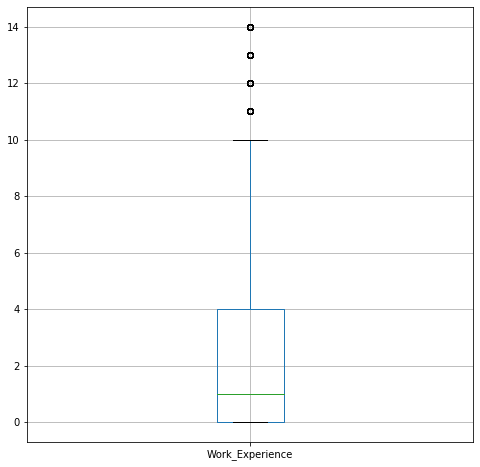

In [33]:
plt.figure(figsize=(8,8))
pandas_df.boxplot(column="Work_Experience")
plt.show()

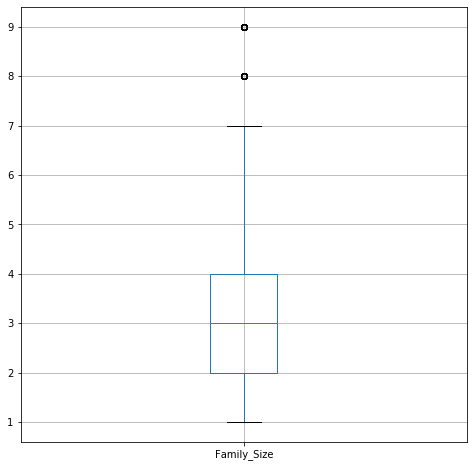

In [34]:
plt.figure(figsize=(8,8))
pandas_df.boxplot(column="Family_Size")
plt.show()

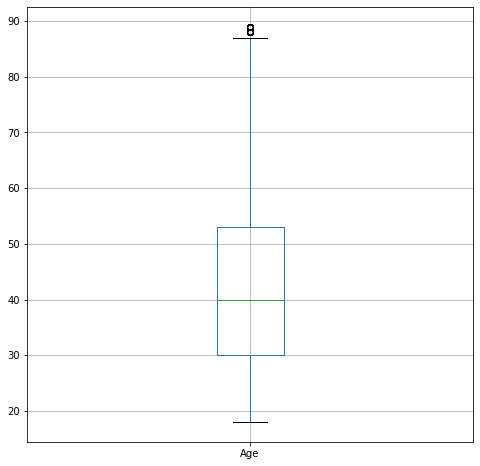

In [35]:
plt.figure(figsize=(8,8))
pandas_df.boxplot(column="Age")
plt.show()

In [36]:
min_val=(pandas_df['Work_Experience'].mean()) - (3* pandas_df['Work_Experience'].std())
print(min_val)

-7.322764895256492


In [37]:
max_val=(pandas_df['Work_Experience'].mean())+(3*pandas_df['Work_Experience'].std())
print(max_val)

12.268724240819209


In [38]:
work_experience_unique = data.select("Work_Experience").distinct()
work_experience_unique.show()

+---------------+
|Work_Experience|
+---------------+
|             12|
|              1|
|             13|
|              6|
|              3|
|              5|
|              9|
|              4|
|              8|
|              7|
|             10|
|             11|
|             14|
|              2|
|              0|
+---------------+



In [39]:
min_val=(pandas_df['Family_Size'].mean()) - (3* pandas_df['Family_Size'].std())
print(min_val)

-1.642383783538882


In [40]:
max_val=(pandas_df['Family_Size'].mean()) + (3* pandas_df['Family_Size'].std())
print(max_val)

7.355075900544335


In [41]:
family_size_unique = data.select("Family_Size").distinct()
family_size_unique.show()

+-----------+
|Family_Size|
+-----------+
|          1|
|          6|
|          3|
|          5|
|          9|
|          4|
|          8|
|          7|
|          2|
+-----------+



In [42]:
min_val=(pandas_df['Age'].mean()) - (3* pandas_df['Age'].std())
print(min_val)

-6.668182659683708


In [43]:
max_val=(pandas_df['Age'].mean()) + (3* pandas_df['Age'].std())
print(max_val)

93.60199525264355


In [44]:
age_unique = data.select("Age").distinct()
age_unique.show()

+---+
|Age|
+---+
| 31|
| 85|
| 65|
| 53|
| 78|
| 81|
| 28|
| 76|
| 26|
| 27|
| 22|
| 47|
| 52|
| 86|
| 40|
| 20|
| 57|
| 48|
| 19|
| 41|
+---+
only showing top 20 rows



In [45]:
def plot_boxplot(df,ft):
    pandas_df.boxplot(columns=[ft])
    plt.show()

In [47]:
from pyspark.sql.functions import col, expr
def outliers (df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    ls=df.index[(df[ft] < lower_fence) | (df[ft] > upper_fence) ]
    return(ls)

In [48]:
index_list=[]
for feature in ['Work_Experience','Family_Size','Age']:
    index_list.extend(outliers(pandas_df,feature))
#index_list

In [49]:
def remove (df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return(df)

In [50]:
outliers(pandas_df,'Work_Experience')

Int64Index([  20,   22,   42,   55,  176,  257,  321,  338,  367,  391,
            ...
            7586, 7663, 7726, 7798, 7808, 7835, 7870, 7990, 8028, 8043],
           dtype='int64', length=189)

In [51]:
df_cleaned=remove(pandas_df,index_list)

In [52]:
df_cleaned.count()

ID                 7720
Gender             7720
Ever_Married       7720
Age                7720
Graduated          7720
Profession         7720
Work_Experience    7720
Spending_Score     7720
Family_Size        7720
Var_1              7720
Segmentation       7720
dtype: int64

In [53]:
 df_cleaned.rename(columns={"Ever_Married":"marital status","Profession":"career"},inplace=True)

In [54]:
df_cleaned.corr

<bound method DataFrame.corr of           ID  Gender marital status  Age Graduated         career  \
0     462809    Male             No   22        No     Healthcare   
1     462643  Female            Yes   38       Yes       Engineer   
2     466315  Female            Yes   67       Yes       Engineer   
3     461735    Male            Yes   67       Yes         Lawyer   
4     462669  Female            Yes   40       Yes  Entertainment   
...      ...     ...            ...  ...       ...            ...   
8063  464018    Male             No   22        No         Artist   
8064  464685    Male             No   35        No      Executive   
8065  465406  Female             No   33       Yes     Healthcare   
8066  467299  Female             No   27       Yes     Healthcare   
8067  461879    Male            Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                   1            Low            4  Cat_4           

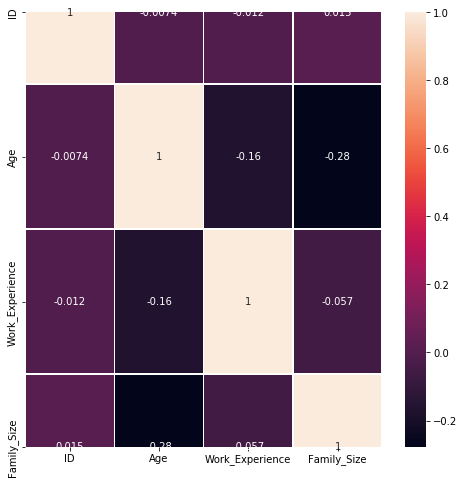

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(df_cleaned.corr(),annot=True,linewidths=.5)

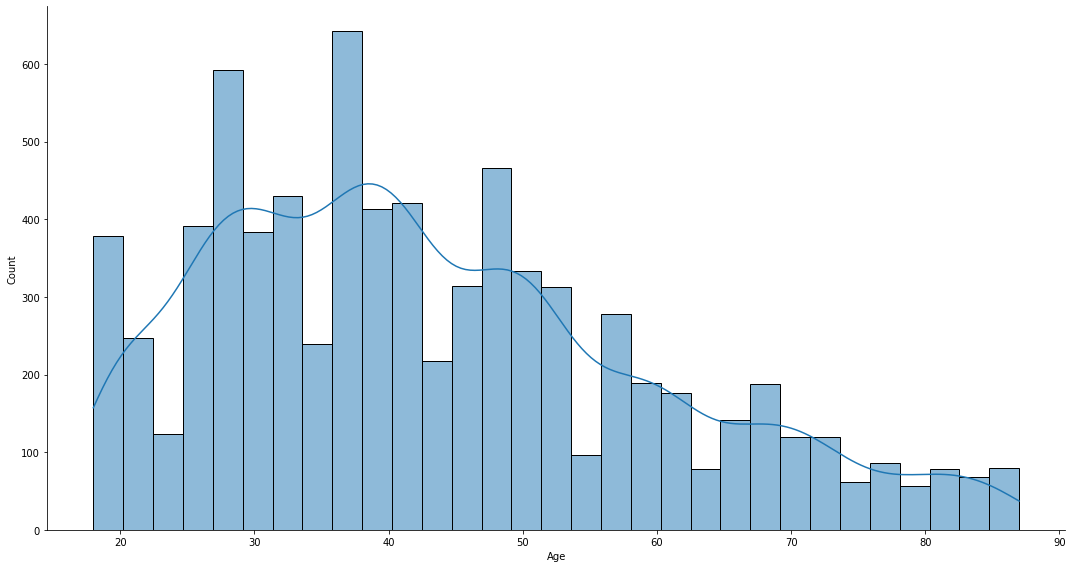

In [56]:
sns.displot(data=df_cleaned,x='Age',kde=True,height=8,aspect=15/8)

In [57]:
df_cleaned.groupby(by=['Age','Gender']).count()

ID  marital status  Graduated  career  Work_Experience  \
Age Gender                                                           
18  Female  45              45         45      45               45   
    Male    81              81         81      81               81   
19  Female  42              42         42      42               42   
    Male    86              86         86      86               86   
20  Female  52              52         52      52               52   
...         ..             ...        ...     ...              ...   
85  Male    13              13         13      13               13   
86  Female  17              17         17      17               17   
    Male    12              12         12      12               12   
87  Female  14              14         14      14               14   
    Male    14              14         14      14               14   

            Spending_Score  Family_Size  Var_1  Segmentation  
Age Gender                                                    
18  Female              45           45     45            45  
    Male                81           81     81            81  
19  Female              42           42     42            42  
    Male                86           86     86            86  
20  Female              52           52     52            52  
...                    ...          ...    ...           ...  
85  Male                13           13     13            13  
86  Female              17           17     17            17  
    Male                12           12     12            12  
87  Female              14           14     14            14  
    Male                14           14     14            14  

[130 rows x 9 columns]

In [58]:
bins=[18,21,31,41,51,61,71,81,89]
labels=['18-20','21-30','31-40','41-50','51-60','61-70','71-80','81-89']
df_cleaned['Age_group']=pd.cut(df_cleaned['Age'],bins=bins,labels=labels)
df_cleaned

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D,21-30
1,462643,Female,Yes,38,Yes,Engineer,1,Average,3,Cat_4,A,31-40
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B,61-70
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B,61-70
4,462669,Female,Yes,40,Yes,Entertainment,1,High,6,Cat_6,A,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0,Low,7,Cat_1,D,21-30
8064,464685,Male,No,35,No,Executive,3,Low,4,Cat_4,D,31-40
8065,465406,Female,No,33,Yes,Healthcare,1,Low,1,Cat_6,D,31-40
8066,467299,Female,No,27,Yes,Healthcare,1,Low,4,Cat_6,B,21-30


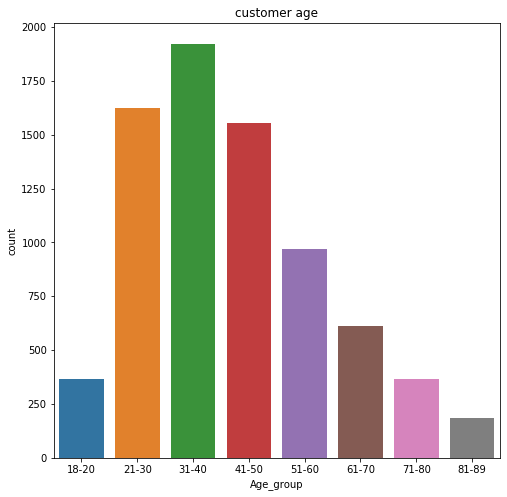

In [59]:
plt.figure(figsize=(8,8))
plt.title('customer age')
plt.xlabel('Age_group')
sns.countplot(x='Age_group',data=df_cleaned)

In [60]:
df_cleaned.pivot_table(index='Age_group',columns='Gender',values='Segmentation',aggfunc='count')

Gender,Female,Male
Age_group,,
18-20,140,225
21-30,770,855
31-40,939,983
41-50,740,814
51-60,369,599
61-70,239,372
71-80,157,209
81-89,79,104


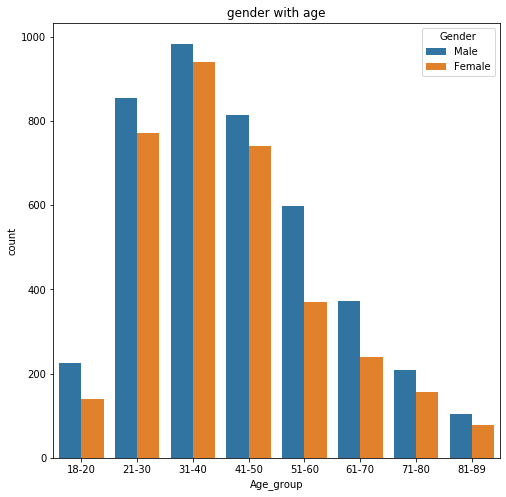

In [61]:
plt.figure(figsize=(8,8))
plt.title('gender with age')
sns.countplot(data=df_cleaned, x="Age_group", hue="Gender")

In [62]:
pivot_table=df_cleaned.pivot_table(index='career',columns='Segmentation',values='Work_Experience')
pivot_table=pivot_table.astype(int)
pivot_table

Segmentation,A,B,C,D
career,,,,
Artist,2,2,2,2
Doctor,2,1,2,2
Engineer,2,1,2,2
Entertainment,2,2,1,2
Executive,1,1,2,2
Healthcare,2,1,2,2
Homemaker,5,3,4,6
Lawyer,1,1,1,1
Marketing,2,1,2,2


In [63]:
df_cleaned.groupby(by=['ID']).count()

,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
ID,,,,,,,,,,,
458982,1,1,1,1,1,1,1,1,1,1,1
458983,1,1,1,1,1,1,1,1,1,1,1
458984,1,1,1,1,1,1,1,1,1,1,1
458985,1,1,1,1,1,1,1,1,1,1,1
458986,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
467969,1,1,1,1,1,1,1,1,1,1,1
467971,1,1,1,1,1,1,1,1,1,1,1
467972,1,1,1,1,1,1,1,1,1,1,1


In [64]:
df_cleaned.duplicated(['ID'])

0       False
1       False
2       False
3       False
4       False
        ...  
8063    False
8064    False
8065    False
8066    False
8067    False
Length: 7720, dtype: bool

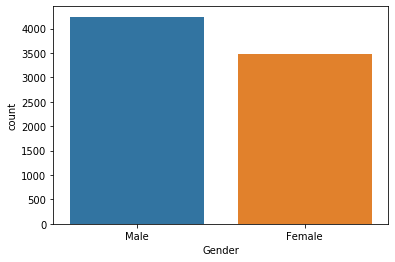

In [65]:
sns.countplot(data = df_cleaned, x='Gender')

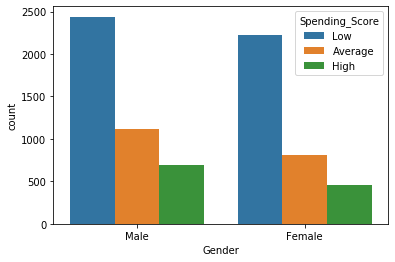

In [66]:
sns.countplot(data=df_cleaned,x='Gender',hue='Spending_Score')

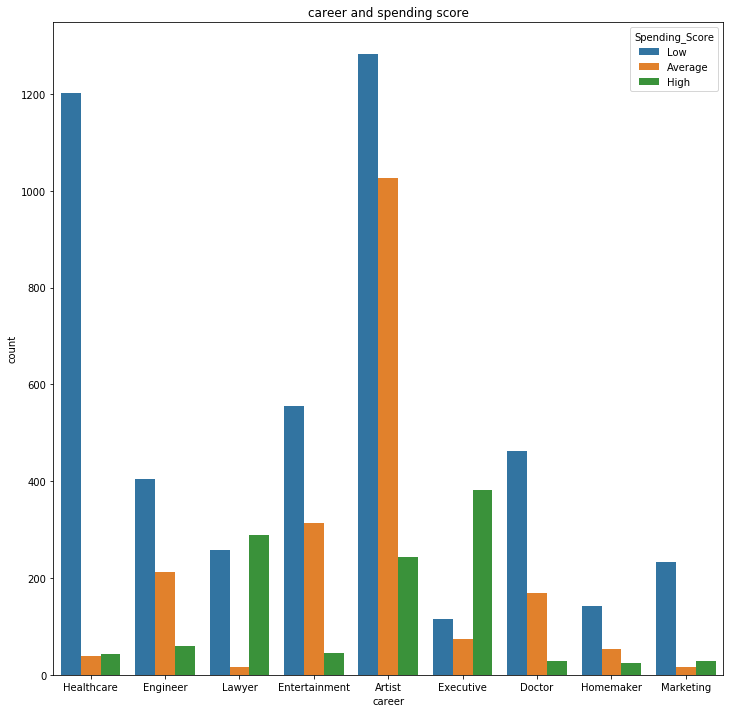

In [67]:
plt.figure(figsize=(12,12))
plt.title("career and spending score")
sns.countplot(data = df_cleaned, x='career', hue='Spending_Score')

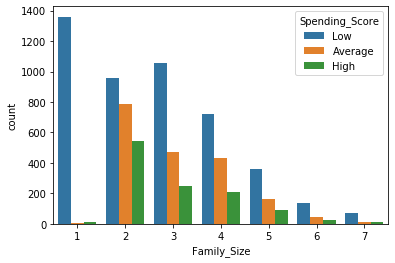

In [68]:
sns.countplot(data = df_cleaned, x='Family_Size', hue='Spending_Score')

In [69]:
df_cleaned['Gender']=df_cleaned['Gender'].map({'Male':1,'Female':0})

In [70]:
df_cleaned['marital status']=df_cleaned['marital status'].map({'Yes':1,'No':0})

In [71]:
df_cleaned['Graduated']=df_cleaned['Graduated'].map({'Yes':1,'No':0})

In [72]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,1,0,22,0,Healthcare,1,Low,4,Cat_4,D,21-30
1,462643,0,1,38,1,Engineer,1,Average,3,Cat_4,A,31-40
2,466315,0,1,67,1,Engineer,1,Low,1,Cat_6,B,61-70
3,461735,1,1,67,1,Lawyer,0,High,2,Cat_6,B,61-70
4,462669,0,1,40,1,Entertainment,1,High,6,Cat_6,A,31-40


In [73]:
df_cleaned['Spending_Score']=df_cleaned['Spending_Score'].replace(['Low','Average','High'],[0,2,1])

In [74]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_cleaned['Var_1']=enc.fit_transform(df_cleaned['Var_1'].astype('str'))

In [75]:
df_cleaned['career']=enc.fit_transform(df_cleaned['career'].astype('str'))

In [76]:
df_cleaned['Segmentation']=enc.fit_transform(df_cleaned['Segmentation'].astype('str'))

In [77]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,1,0,22,0,5,1,0,4,3,3,21-30
1,462643,0,1,38,1,2,1,2,3,3,0,31-40
2,466315,0,1,67,1,2,1,0,1,5,1,61-70
3,461735,1,1,67,1,7,0,1,2,5,1,61-70
4,462669,0,1,40,1,3,1,1,6,5,0,31-40


In [78]:
df_cleaned.drop(['Age_group'],axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit_transform(df_cleaned)
df_cleaned=pd.DataFrame(df_cleaned,columns=['ID','Gender','marital status','Age','Graduated','career','Work_Experience','Spending_Score',
'Family_Size','Var_1','Segmentation'])

In [79]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,0,4,3,3
1,462643,0,1,38,1,2,1,2,3,3,0
2,466315,0,1,67,1,2,1,0,1,5,1
3,461735,1,1,67,1,7,0,1,2,5,1
4,462669,0,1,40,1,3,1,1,6,5,0


In [80]:
x=df_cleaned.iloc[:,:-1]
y=df_cleaned.iloc[:,-1]

In [81]:
x

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,1,0,4,3
1,462643,0,1,38,1,2,1,2,3,3
2,466315,0,1,67,1,2,1,0,1,5
3,461735,1,1,67,1,7,0,1,2,5
4,462669,0,1,40,1,3,1,1,6,5
...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0,0,0,7,0
8064,464685,1,0,35,0,4,3,0,4,3
8065,465406,0,0,33,1,5,1,0,1,5
8066,467299,0,0,27,1,5,1,0,4,5


In [82]:
y

0       3
1       0
2       1
3       1
4       0
       ..
8063    3
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 7720, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [84]:
x_train.shape

(5404, 10)

In [85]:
y_train.shape

(5404,)

In [86]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
encoded_y=lbl.fit_transform(y_train)
encoded_ytest=lbl.fit_transform(y_test)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import time
iris = load_iris()
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [88]:
error_state=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    ypred=knn.predict(x_test)
    error_state.append(np.mean(ypred != encoded_ytest))

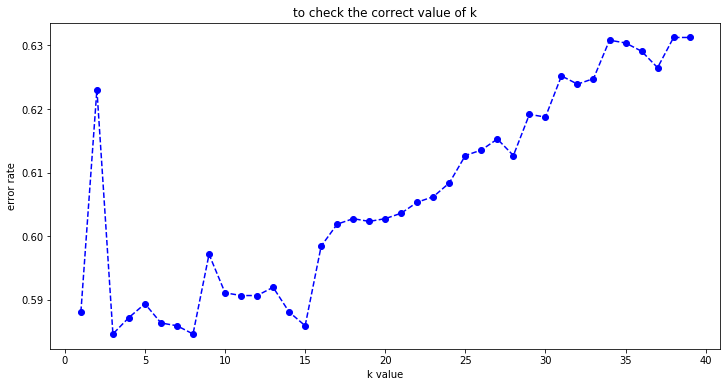

In [89]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_state,color='blue',linestyle='dashed',marker='o')
plt.xlabel("k value")
plt.ylabel("error rate")
plt.title("to check the correct value of k")
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [91]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,encoded_y)
yknn_predict=knn.predict(x_test)
knn_conf_matrix=confusion_matrix(yknn_predict,encoded_ytest)

In [92]:
knn_conf_matrix

array([[202, 135,  86, 150],
       [140, 151, 130,  86],
       [121, 154, 285,  79],
       [110,  86,  80, 321]])

In [93]:
knn_accuracy_score=accuracy_score(yknn_predict,encoded_ytest)

In [94]:
print(np.round(knn_accuracy_score*100,2),"%")

41.41 %


In [95]:
end_time = time.time()
run_time = end_time - start_time
print("Run time:", run_time, "seconds")

Run time: 180.96199989318848 seconds


In [96]:
df_spark = spark.createDataFrame(df_cleaned)

In [97]:
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [98]:
rdd3=df_spark.rdd

In [99]:
type(rdd3)

pyspark.rdd.RDD

In [100]:
rdd3.collect()

[Row(ID=462809, Gender=1, marital status=0, Age=22, Graduated=0, career=5, Work_Experience=1, Spending_Score=0, Family_Size=4, Var_1=3, Segmentation=3),
 Row(ID=462643, Gender=0, marital status=1, Age=38, Graduated=1, career=2, Work_Experience=1, Spending_Score=2, Family_Size=3, Var_1=3, Segmentation=0),
 Row(ID=466315, Gender=0, marital status=1, Age=67, Graduated=1, career=2, Work_Experience=1, Spending_Score=0, Family_Size=1, Var_1=5, Segmentation=1),
 Row(ID=461735, Gender=1, marital status=1, Age=67, Graduated=1, career=7, Work_Experience=0, Spending_Score=1, Family_Size=2, Var_1=5, Segmentation=1),
 Row(ID=462669, Gender=0, marital status=1, Age=40, Graduated=1, career=3, Work_Experience=1, Spending_Score=1, Family_Size=6, Var_1=5, Segmentation=0),
 Row(ID=461319, Gender=1, marital status=1, Age=56, Graduated=0, career=0, Work_Experience=0, Spending_Score=2, Family_Size=2, Var_1=5, Segmentation=2),
 Row(ID=460156, Gender=1, marital status=0, Age=32, Graduated=1, career=5, Work_Ex

In [105]:
from pyspark.sql import HiveContext


In [119]:
df_spark.head()

Row(ID=462809, Gender=1, marital status=0, Age=22, Graduated=0, career=5, Work_Experience=1, Spending_Score=0, Family_Size=4, Var_1=3, Segmentation=3)

In [115]:
spark = SparkSession.builder.appName('Write DataFrame to Hive').enableHiveSupport().getOrCreate()

In [ ]:
df_spark.write.mode('overwrite').saveAsTable('customers')